# Loading Packages

In [1]:
using Pkg
Pkg.activate("../../julia_env/CloudCleanEx")

  Activating new project at `/n/holylfs05/LABS/finkbeiner_lab/Lab/saydjari/julia_env/CloudCleanEx`


In [9]:
first_time = false
ENV["JULIA_CONDAPKG_BACKEND"] = "MicroMamba";
if first_time
    Pkg.add(url="https://github.com/andrew-saydjari/CloudClean.jl")
    Pkg.add("FITSIO")
    Pkg.add(["CondaPkg","PythonCall","PythonPlot"])
    using CondaPkg
    CondaPkg.add("colorcet")
end

In [10]:
using CloudClean, FITSIO

In [12]:
using CondaPkg; ENV["JULIA_CONDAPKG_BACKEND"] = "MicroMamba"; using PythonCall
import PythonPlot; const plt = PythonPlot.pyplot

plt.matplotlib.style.use("dark_background"); cc=pyimport("colorcet");
pyimport("sys").stdout = pytextio(stdout); pyimport("sys").stderr = pytextio(stderr);

# Synthetic Filament Example

Here we show CloudClean performing well on the difficult example of infilling a filament that is isolated on a flat background, in the presence of noise. It is of note that the infill is correctly anisotropic, in contrast to most kernel methods that make an isotropic assumption.

In [15]:
path2CloudClean = "./CloudClean.jl/"
f = FITS(path2CloudClean*"examples/data/SynthFilaments.fits")
out_image = read(f[1])
close(f)

In [18]:
cenx = 520+59
ceny = 520+59
Np = 33
halfNp = (Np-1)÷2
dv = halfNp
shiftx = 5
bimage = zeros(Bool,size(out_image));
circmask = .!kstar_circle_mask(33,rlim=6^2);
bimage[(cenx+shiftx-dv):(cenx+shiftx+dv),(ceny-dv):(ceny+dv)].=circmask;
out_image[bimage].=0
count(bimage)

113

In [20]:
ndraw0 = 2
widx = 129
x_locs = [cenx]
y_locs = [ceny]
star_stats = proc_discrete(x_locs,y_locs,out_image,bimage,tilex=4,ftype=64,widx=widx,seed=2022,ndraw=ndraw0);

Infilling completed after 1 rounds with final width (widx,widy) = (27,27)
Finished 0 stars in tile (1, 1)
Finished 0 stars in tile (1, 2)
Finished 0 stars in tile (1, 3)
Finished 0 stars in tile (1, 4)
Finished 1 stars in tile (2, 1)
Finished 0 stars in tile (2, 2)
Finished 0 stars in tile (2, 3)
Finished 0 stars in tile (2, 4)
Finished 0 stars in tile (3, 1)
Finished 0 stars in tile (3, 2)
Finished 0 stars in tile (3, 3)
Finished 0 stars in tile (3, 4)
Finished 0 stars in tile (4, 1)
Finished 0 stars in tile (4, 2)
Finished 0 stars in tile (4, 3)
Finished 0 stars in tile (4, 4)


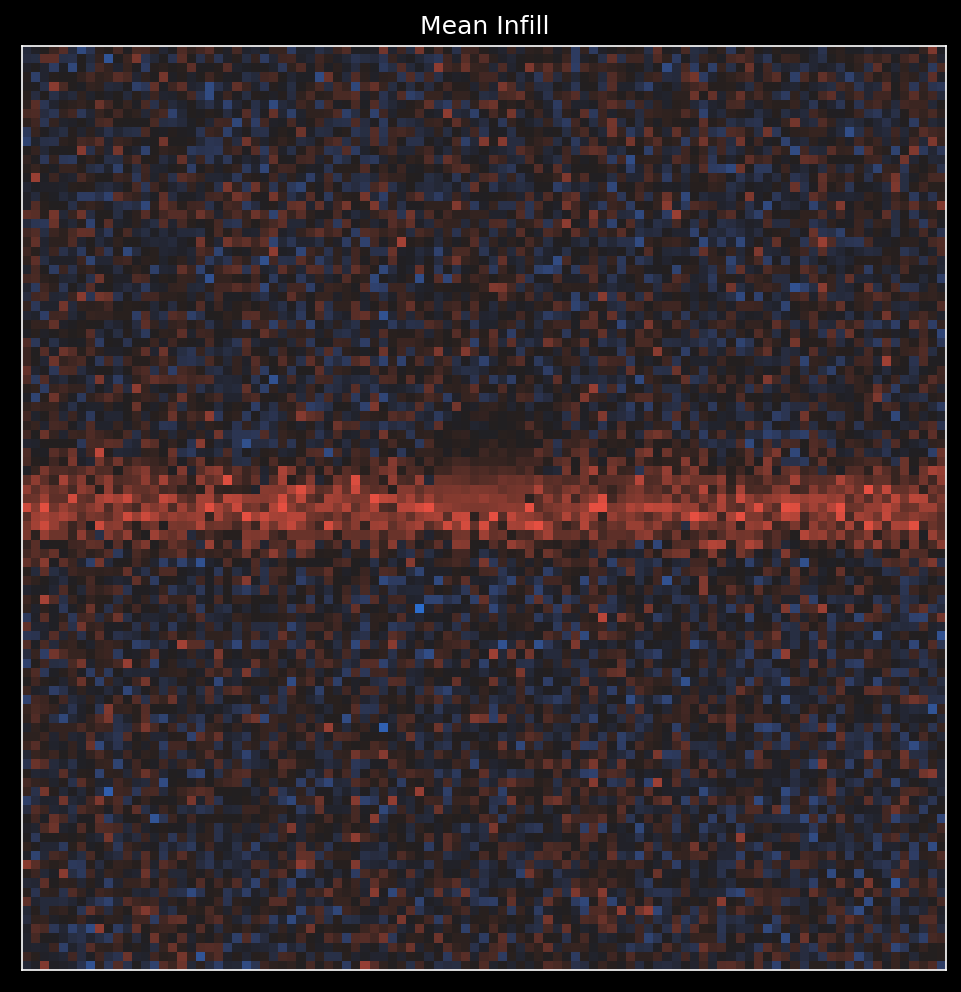

In [21]:
fig = plt.figure(figsize=(8,8), dpi=150)
dv = 50
ax = fig.add_subplot(1,1,1)
sc = ax.imshow(
    star_stats[1][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)].-100,
    origin="lower",
    interpolation="nearest",
    cmap="cet_bkr",
    aspect="equal",
    clim=[-50,50]
)
ax.set_title("Mean Infill")

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([]);

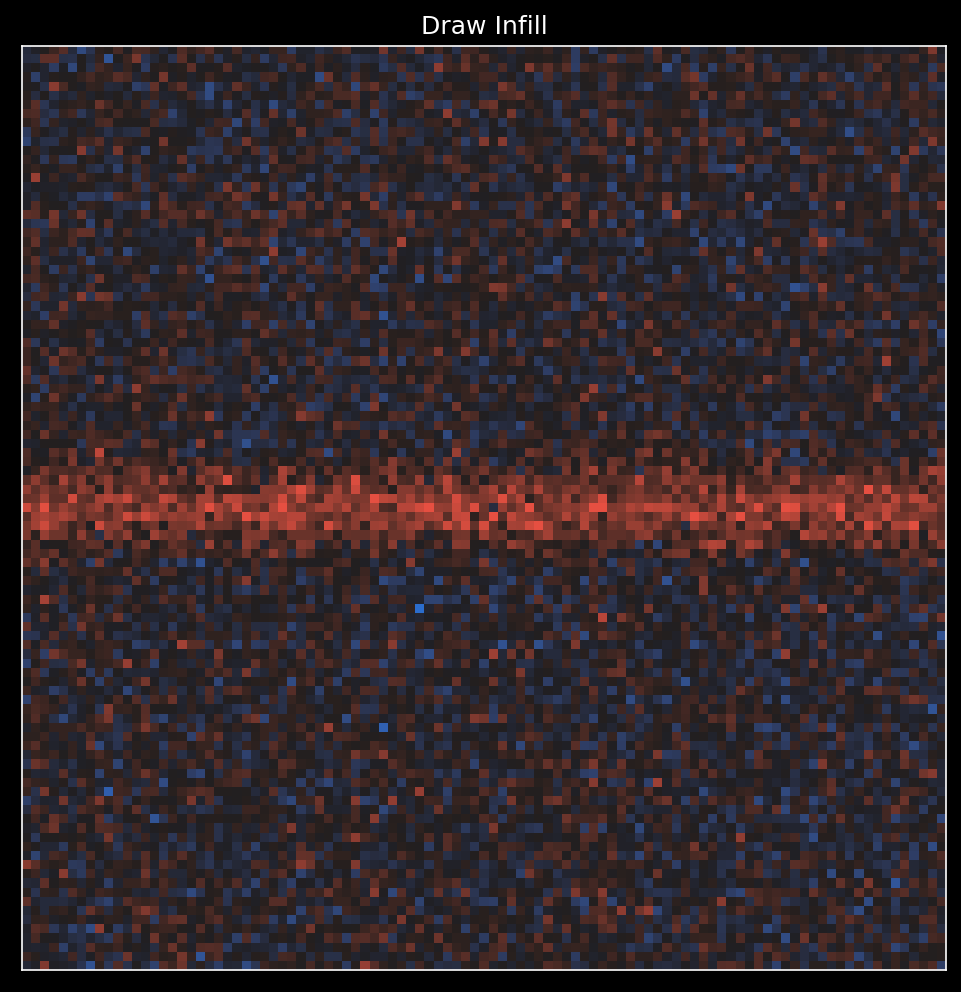

In [22]:
fig = plt.figure(figsize=(8,8), dpi=150)
dv = 50
ax = fig.add_subplot(1,1,1)
sc = ax.imshow(
    star_stats[2][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv),1].-100,
    origin="lower",
    interpolation="nearest",
    cmap="cet_bkr",
    aspect="equal",
    clim=[-50,50]
)
ax.set_title("Draw Infill")

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([]);